<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Discrete_and_Continuous_Random_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.stats as stats
from statsmodels.stats import stattools
from __future__ import division

In [2]:
class DiscreteRandomVariable:
    def __init__(self, a=0, b=1):
        self.variable_type = ""
        self.low = a
        self.high = b
    def draw(self, number_of_samples):
        samples = np.random.random_integers(
            self.low, self.high, number_of_samples
        )
        return samples

<ipython-input-2-214c56f1982f>:7: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  samples = np.random.random_integers(


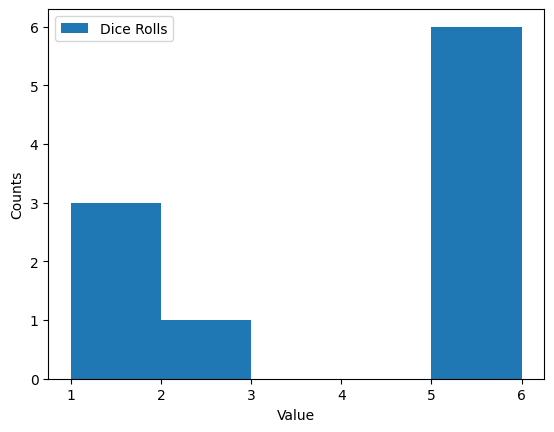

In [3]:
dice_rolls = DiscreteRandomVariable(a=1, b=6)
plt.hist(dice_rolls.draw(10), bins=[1, 2, 3, 4, 5, 6], align='mid')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.legend(['Dice Rolls'])
plt.show()

<ipython-input-2-214c56f1982f>:7: DeprecationWarning: This function is deprecated. Please call randint(1, 6 + 1) instead
  samples = np.random.random_integers(


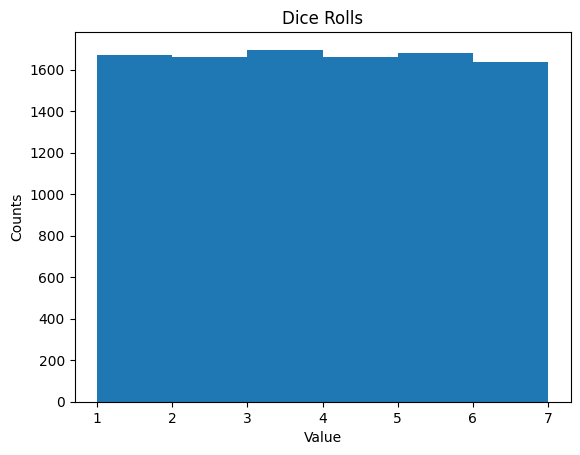

In [11]:
plt.hist(dice_rolls.draw(10_000), bins=[1, 2, 3, 4, 5, 6, 7], align='mid')
plt.xlabel('Value')
plt.ylabel('Counts')
plt.title('Dice Rolls')
plt.show()

In [12]:
class BinomialRandomVariable(DiscreteRandomVariable):
    def __init__(self, number_of_trials=10, probability_of_success=0.5):
        self.variable_type = 'Binomial'
        self.number_of_trials = number_of_trials
        self.probability_of_success = probability_of_success

        return
    def draw(self, number_of_samples):
        samples = np.random.binomial(
            self.number_of_trials, self.probability_of_success, number_of_samples
        )
        return samples

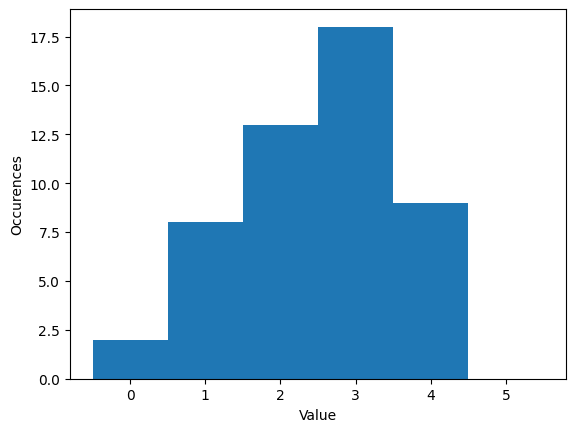

In [14]:
stock_probabilities = BinomialRandomVariable(5, 0.5)
plt.hist(stock_probabilities.draw(50), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.show()

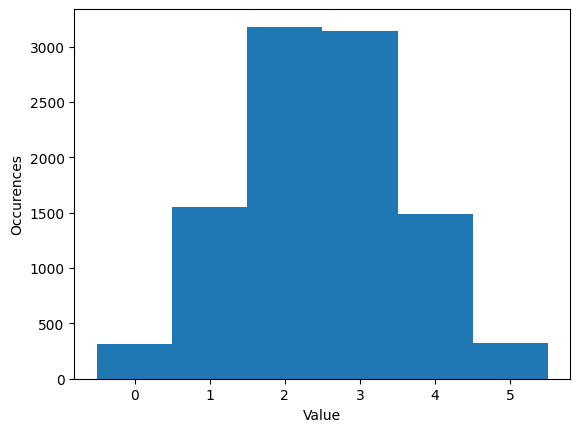

In [15]:
plt.hist(stock_probabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.show()

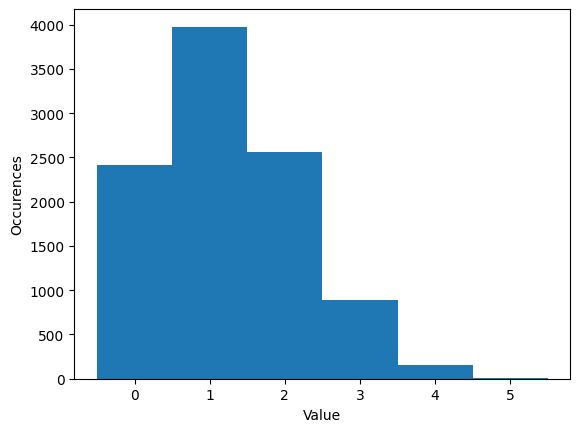

In [16]:
stock_probabilities = BinomialRandomVariable(5, 0.25)
plt.hist(stock_probabilities.draw(10000), bins = [0, 1, 2, 3, 4, 5, 6], align = 'left')
plt.xlabel('Value')
plt.ylabel('Occurences')
plt.show()

## Maximum Liklihood Estimation

In [28]:
mu = 40
std = 10
X = np.random.normal(mu, std, 1000)

norm_mu_MLE = lambda x: sum(x) / len(x)
norm_std_MLE = lambda x: np.power((sum((x - norm_mu_MLE(x))**2) / len(x)), 0.5)
# print(norm_mu_MLE(X))

In [29]:
print('Mean Estimation')
print(f'MLE = {norm_mu_MLE(X)}')
print(f'Numpy = {np.mean(X)}')
print('Standard Deviation Estimation')
print(f'MLE = {norm_std_MLE(X)}')
print(f'Numpy = {np.std(X)}')

Mean Estimation
MLE = 40.70981059279273
Numpy = 40.70981059279272
Standard Deviation Estimation
MLE = 10.007755620045513
Numpy = 10.00775562004551


In [30]:
## using scipy
import scipy
mu, std = scipy.stats.norm.fit(X)
print(f'Mu: {mu}, Std: {std}')

Mu: 40.70981059279272, Std: 10.00775562004551


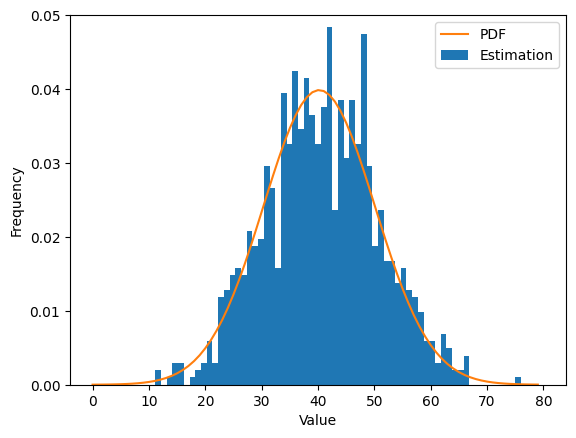

In [37]:
pdf = scipy.stats.norm.pdf

x = np.linspace(0, 80, 80)
plt.hist(X, bins=x, density=True)
plt.plot(pdf(x, loc=mu, scale=std))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim([0, 0.05])
plt.legend(['PDF', 'Estimation'])
plt.show()

In [38]:
# Exponential
X = np.random.exponential(5, 1000)
exp_lambda_MLE = lambda x: sum(x) / len(x)

In [39]:
print(f'lambda estimate: {exp_lambda_MLE(X)}')

lambda estimate: 4.882317668074108


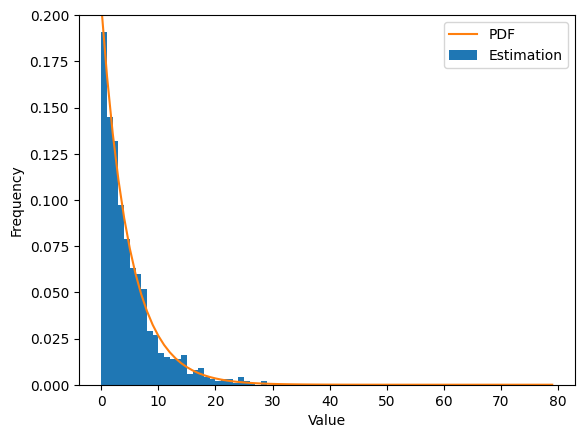

In [43]:
_, l = scipy.stats.expon.fit(X, floc=0)
pdf = scipy.stats.expon.pdf

x = range(0, 80)
plt.hist(X, bins=x, density=True)
plt.plot(pdf(x, scale=l))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.ylim([0, 0.20])
plt.legend(['PDF', 'Estimation'])
plt.show()

In [44]:
import yfinance as yf

prices = yf.download('TSLA', start='2014-01-01', end='2015-01-01')['Close']
absolute_returns = np.diff(prices)
returns = absolute_returns / prices[:-1]

[*********************100%%**********************]  1 of 1 completed


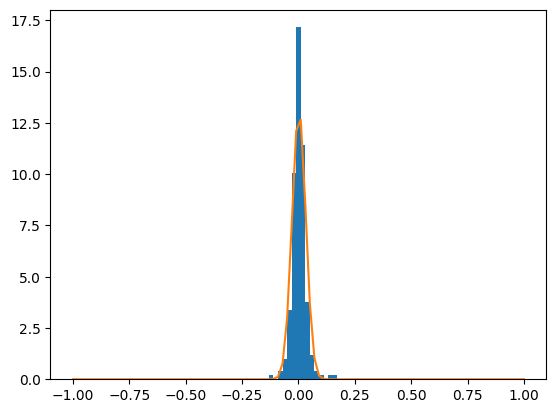

In [45]:
mu, std = scipy.stats.norm.fit(returns)
pdf = scipy.stats.norm.pdf
x = np.linspace(-1, 1, num=100)
h = plt.hist(returns, bins=x, density=True)
l = plt.plot(x, pdf(x, loc=mu, scale=std))

In [46]:
from statsmodels.stats.stattools import jarque_bera
jarque_bera(returns)

(249.43268824491162,
 6.860881912969277e-55,
 0.7513123088069728,
 7.646746902938265)

In [47]:
jarque_bera(np.random.normal(0, 1, 100))

(1.3449098445177672,
 0.5104539136903988,
 -0.10331759855088792,
 2.4707739065361816)